# load libraries

In [1]:
import os
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dir_main = '/content/drive/'
drive.mount(dir_main)
dir_cozero = dir_main + 'My Drive/Colab Notebooks/Housing/data_cozero/'


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
os.listdir(dir_cozero)

['city_reduction_targets_2018_2019.csv', 'Carbon_Emission_Analysis.ipynb']

In [4]:
data = pd.read_csv(dir_cozero + '/city_reduction_targets_2018_2019.csv')

# 1. EDA

1. Perform any cleaning, exploratory analysis, and visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice).

In [5]:
cols_to_drop = ['Identify and explain sources that differ from the inventory', 'Description of the target and the modelling methodology(ies) and parameters used to define it',\
                'Target description', 'Last update']

In [6]:
data_dropped = data.drop(cols_to_drop, axis=1)

## Feature engineering

### Rename feature

In [7]:
column_names = ['Year_CDP', 'Account', 'Organization', 'City', 'Country', 'CDP_region', 'Report_authority', 'Access', 'City_boundary', 'Type_target', 'Sector', \
               'Target_boundary', 'Base_year', 'Target_implementation', 'Base_year_emissions', 'Percentage_reduction', 'Target_year',  'Target_emissions', 
                'Projected_population', 'Intensity_unit', 'Base_year_emissions_unit', 'Estimated_Emissions',\
                'Percentage_target', 'Sector_target', 'Paris_agreement', 'Higher_level', 'Population', 'Population_year', 'City_location'] 

In [8]:
data_dropped.columns = column_names

### Drop unnecessary columns

In [9]:
data_dropped.head(2)

,Year_CDP,Account,Organization,City,Country,CDP_region,Report_authority,Access,City_boundary,Type_target,Sector,Target_boundary,Base_year,Target_implementation,Base_year_emissions,Percentage_reduction,Target_year,Target_emissions,Projected_population,Intensity_unit,Base_year_emissions_unit,Estimated_Emissions,Percentage_target,Sector_target,Paris_agreement,Higher_level,Population,Population_year,City_location
0,2019,36223,Antananarivo,Antananarivo,Madagascar,Africa,"CDP Cities, ICLEI - Local Governments for Sust...",public,City / Municipality,Base year emissions (absolute) target,Energy,Larger – covers the whole city and adjoining a...,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Energy industry, Other, Water",Yes - 1.5 °C,NaN,1370326.0,2015.0,POINT (47.5079 -18.8792)
1,2019,35872,Municipality of Recife,Recife,Brazil,Latin America,"CDP Cities, ICLEI - Local Governments for Sust...",public,City / Municipality,Baseline scenario (business as usual) target,All emissions sources included in city inventory,NaN,2012.0,2016.0,3120425.0,11.28,2020.0,NaN,NaN,NaN,NaN,4093521.0,NaN,NaN,NaN,NaN,1637834.0,2018.0,POINT (-34.8829 -8.05783)


In [10]:
data_dropped['Emission_Target2Base']= (data_dropped['Target_emissions']-data_dropped['Base_year_emissions'])/data_dropped['Base_year_emissions']#.hist(bins=30)

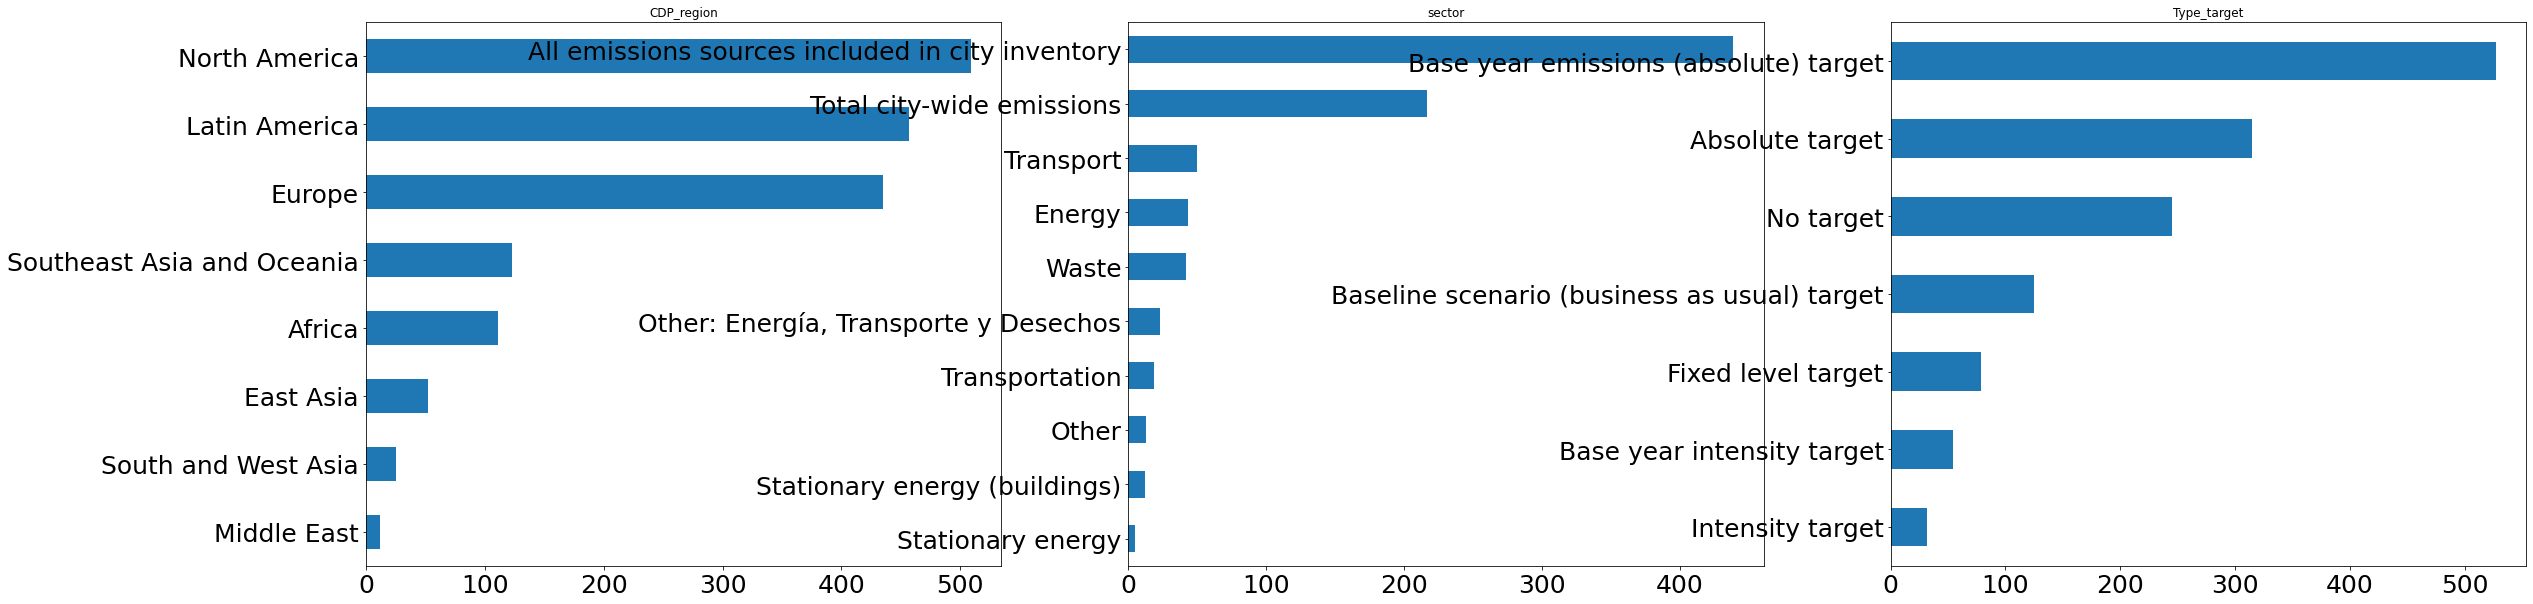

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
plt.subplots_adjust(left=0, bottom=None, right=1, top=None, wspace=None, hspace=None)
data_dropped['CDP_region'].value_counts().sort_values(ascending=True).plot.barh(ax=axes[0], title='CDP_region', fontsize=25, align='center')
data_dropped['Sector'].value_counts().sort_values(ascending=True)[-10:].plot.barh(ax=axes[1], title='sector', fontsize=25)
data_dropped['Type_target'].value_counts().sort_values(ascending=True).plot.barh(ax=axes[2], title='Type_target', fontsize=25)
plt.show()

In [12]:
data_type = data_dropped

In [13]:
data_dropped.isna().mean()

Year_CDP                    0.000000
Account                     0.000000
Organization                0.000000
City                        0.158353
Country                     0.000000
CDP_region                  0.000000
Report_authority            0.000000
Access                      0.000000
City_boundary               0.202436
Type_target                 0.201276
Sector                      0.457657
Target_boundary             0.647912
Base_year                   0.480858
Target_implementation       0.663573
Base_year_emissions         0.555104
Percentage_reduction        0.471578
Target_year                 0.453596
Target_emissions            0.799304
Projected_population        0.980858
Intensity_unit              0.969838
Base_year_emissions_unit    0.975638
Estimated_Emissions         0.951276
Percentage_target           0.659513
Sector_target               0.684455
Paris_agreement             0.675754
Higher_level                0.699536
Population                  0.208237
P

In [14]:
data_type = data_type.loc[:,data_type.isna().mean() < 0.8]

In [15]:
data_type.isna().mean()

Year_CDP                 0.000000
Account                  0.000000
Organization             0.000000
City                     0.158353
Country                  0.000000
CDP_region               0.000000
Report_authority         0.000000
Access                   0.000000
City_boundary            0.202436
Type_target              0.201276
Sector                   0.457657
Target_boundary          0.647912
Base_year                0.480858
Target_implementation    0.663573
Base_year_emissions      0.555104
Percentage_reduction     0.471578
Target_year              0.453596
Target_emissions         0.799304
Percentage_target        0.659513
Sector_target            0.684455
Paris_agreement          0.675754
Higher_level             0.699536
Population               0.208237
Population_year          0.210557
City_location            0.200116
dtype: float64

In [16]:
data_bycountry = data_type.groupby(['Country'])#['Base_year_emissions'].mean().sort_values(ascending=False)

In [17]:
data_bycountry.mean()#['Base_year_emissions'].mean()

,Year_CDP,Account,Base_year,Target_implementation,Base_year_emissions,Percentage_reduction,Target_year,Target_emissions,Percentage_target,Population,Population_year
Country,,,,,,,,,,,
Albania,2019.000000,59163.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,2018.923077,379558.505495,2014.285714,2018.685714,6.357063e+05,20.314286,2029.857143,9272.000000,2.000000,1.954096e+05,2011.982759
Australia,2018.625000,48434.541667,2005.384615,2014.833333,2.282413e+06,70.384615,2031.277778,735037.333333,33.966798,1.627622e+05,2017.842105
Bangladesh,2018.500000,50782.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+06,2019.000000
Belgium,2019.000000,35854.000000,2008.000000,2016.000000,1.171498e+06,40.000000,2030.000000,702899.000000,42.000000,1.792770e+05,2018.000000
...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,2019.000000,42388.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380432e+06,2016.000000
Venezuela (Bolivarian Republic of),2019.000000,840693.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Viet Nam,2018.750000,637750.750000,2018.000000,2019.000000,7.637635e+05,0.350000,2040.000000,530413.750000,0.000000,2.595167e+05,2018.000000


In [18]:
data_bycountry.sum()

,Year_CDP,Account,Base_year,Target_implementation,Base_year_emissions,Percentage_reduction,Target_year,Target_emissions,Percentage_target,Population,Population_year
Country,,,,,,,,,,,
Albania,2019,59163,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Argentina,183722,34539824,70500.0,70654.0,22249720.6,711.0,71045.0,9272.0,8.000000,11333755.0,116695.0
Australia,48447,1162429,26070.0,24178.0,25106542.0,915.0,36563.0,4410224.0,373.634782,3092481.0,38339.0
Bangladesh,4037,101564,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6000000.0,2019.0
Belgium,2019,35854,2008.0,2016.0,1171498.0,40.0,2030.0,702899.0,42.000000,179277.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,2019,42388,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1380432.0,2016.0
Venezuela (Bolivarian Republic of),2019,840693,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Viet Nam,8075,2551003,4036.0,4038.0,1527527.0,0.7,4080.0,1060827.5,0.000000,778550.0,6054.0


In [19]:
cols_to_drop = ['Account', 'Report_authority','Access', 'Type_target', 'City_location']
data_cleaned = data_type.drop(cols_to_drop, axis=1)

In [20]:
data_cleaned.head(2)

,Year_CDP,Organization,City,Country,CDP_region,City_boundary,Sector,Target_boundary,Base_year,Target_implementation,Base_year_emissions,Percentage_reduction,Target_year,Target_emissions,Percentage_target,Sector_target,Paris_agreement,Higher_level,Population,Population_year
0,2019,Antananarivo,Antananarivo,Madagascar,Africa,City / Municipality,Energy,Larger – covers the whole city and adjoining a...,NaN,NaN,NaN,0.00,NaN,NaN,NaN,"Energy industry, Other, Water",Yes - 1.5 °C,NaN,1370326.0,2015.0
1,2019,Municipality of Recife,Recife,Brazil,Latin America,City / Municipality,All emissions sources included in city inventory,NaN,2012.0,2016.0,3120425.0,11.28,2020.0,NaN,NaN,NaN,NaN,NaN,1637834.0,2018.0


### Drop raws

# 2. Emission/Country

2. What are the average per capita emissions per country? What's the average %-reduction in target values for the top 5 countries by overall emissions?

## Emission per capita

## Emission/capita

In [21]:
# perc_red[perc_red>50].plot.barh(figsize=(10,30))

In [22]:
data_cleaned['Base_Emission_per_capita'] = data_cleaned['Base_year_emissions']/data_cleaned['Population']

In [23]:
data_cleaned[['Country','Base_Emission_per_capita','Population']].head(5)

,Country,Base_Emission_per_capita,Population
0,Madagascar,NaN,1370326.0
1,Brazil,1.905214,1637834.0
2,Italy,NaN,NaN
3,United States of America,12.674355,860090.0
4,New Zealand,NaN,NaN


In [24]:
# data_cleaned[data_cleaned['Country'].isin(['United States of America'])].head(5)

In [25]:
data_countrywise = data_cleaned.groupby(['Country'])#[['Base_year_emissions', 'Percentage_reduction', 'Population', 'Emission_Target2Base']].sum().sort_values(by='Base_year_emissions', ascending=False)#[:60]

In [26]:
data_countrywise.sum()

,Year_CDP,Base_year,Target_implementation,Base_year_emissions,Percentage_reduction,Target_year,Target_emissions,Percentage_target,Population,Population_year,Base_Emission_per_capita
Country,,,,,,,,,,,
Albania,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Argentina,183722,70500.0,70654.0,22249720.6,711.0,71045.0,9272.0,8.000000,11333755.0,116695.0,131.996261
Australia,48447,26070.0,24178.0,25106542.0,915.0,36563.0,4410224.0,373.634782,3092481.0,38339.0,225.601626
Bangladesh,4037,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6000000.0,2019.0,0.000000
Belgium,2019,2008.0,2016.0,1171498.0,40.0,2030.0,702899.0,42.000000,179277.0,2018.0,6.534569
...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1380432.0,2016.0,0.000000
Venezuela (Bolivarian Republic of),2019,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Viet Nam,8075,4036.0,4038.0,1527527.0,0.7,4080.0,1060827.5,0.000000,778550.0,6054.0,6.646333


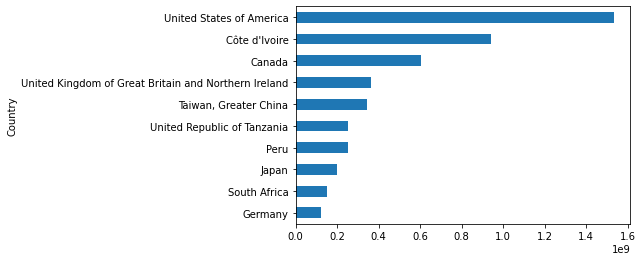

In [27]:
data_countrywise.sum()['Base_year_emissions'].sort_values(ascending=True)[-10:].plot.barh()

In [28]:
data_dropped['Target_Emission/capita'] = data_dropped['Target_emissions']/data_dropped['Population']
data_dropped['Base_Emission/capita'] = data_dropped['Target_emissions']/data_dropped['Population']

In [29]:
data_countrywise['Base_year_emissions'].sum().sort_values()

Country
Albania                                                 0.000000e+00
Gibraltar                                               0.000000e+00
Honduras                                                0.000000e+00
Israel                                                  0.000000e+00
Kenya                                                   0.000000e+00
                                                            ...     
Taiwan, Greater China                                   3.421337e+08
United Kingdom of Great Britain and Northern Ireland    3.625740e+08
Canada                                                  6.066301e+08
Côte d'Ivoire                                           9.404589e+08
United States of America                                1.536851e+09
Name: Base_year_emissions, Length: 94, dtype: float64

In [30]:
# To exclude countries where too little population exist or Base emission is null
min_population = 10000000
min_emission = 0
data_top20_emission_capital = \
((data_countrywise['Base_year_emissions'].sum().loc[data_countrywise['Base_year_emissions'].sum()>min_emission])\
/data_countrywise['Population'].sum().loc[data_countrywise['Population'].sum()>min_population]).sort_values(ascending=True)#[:20]

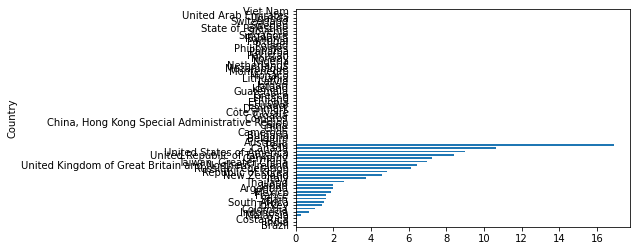

In [31]:
data_top20_emission_capital.plot.barh()

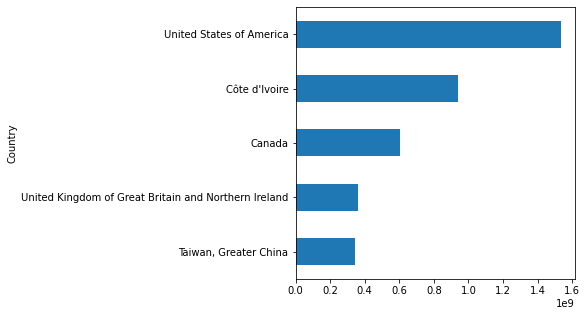

In [32]:
data_countrywise['Base_year_emissions'].sum().sort_values(ascending=True)[-5:].plot.barh(figsize=(5,5))

### Top 5 country

2. What are the average per capita emissions per country? What's the average %-reduction in target values for the top 5 countries by overall emissions?

In [33]:
data_type.groupby(['Country']).sum()

,Year_CDP,Account,Base_year,Target_implementation,Base_year_emissions,Percentage_reduction,Target_year,Target_emissions,Percentage_target,Population,Population_year
Country,,,,,,,,,,,
Albania,2019,59163,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Argentina,183722,34539824,70500.0,70654.0,22249720.6,711.0,71045.0,9272.0,8.000000,11333755.0,116695.0
Australia,48447,1162429,26070.0,24178.0,25106542.0,915.0,36563.0,4410224.0,373.634782,3092481.0,38339.0
Bangladesh,4037,101564,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6000000.0,2019.0
Belgium,2019,35854,2008.0,2016.0,1171498.0,40.0,2030.0,702899.0,42.000000,179277.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,2019,42388,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1380432.0,2016.0
Venezuela (Bolivarian Republic of),2019,840693,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Viet Nam,8075,2551003,4036.0,4038.0,1527527.0,0.7,4080.0,1060827.5,0.000000,778550.0,6054.0


In [34]:
country_top5 = data_type.groupby(['Country'])['Target_emissions'].sum().sort_values(ascending=False)[:5].keys()#.agg([])

In [35]:
data_country5 = data_type[data_type.Country.isin(country_top5)]

In [36]:
# data_country50.groupby(['Country', 'City_boundary'])['Target_emission'].sum()#.sort_values(ascending=False)

In [38]:
data_country5.groupby(['Country'])#['Target_Emission/capita'].sum().sort_values(ascending=True).plot.barh()

In [39]:
data_bycountry.sum()#['Estimated_Emissions']#.sort_values(ascending=True)[-10:].plot.barh()

,Year_CDP,Account,Base_year,Target_implementation,Base_year_emissions,Percentage_reduction,Target_year,Target_emissions,Percentage_target,Population,Population_year
Country,,,,,,,,,,,
Albania,2019,59163,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Argentina,183722,34539824,70500.0,70654.0,22249720.6,711.0,71045.0,9272.0,8.000000,11333755.0,116695.0
Australia,48447,1162429,26070.0,24178.0,25106542.0,915.0,36563.0,4410224.0,373.634782,3092481.0,38339.0
Bangladesh,4037,101564,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6000000.0,2019.0
Belgium,2019,35854,2008.0,2016.0,1171498.0,40.0,2030.0,702899.0,42.000000,179277.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,2019,42388,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1380432.0,2016.0
Venezuela (Bolivarian Republic of),2019,840693,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Viet Nam,8075,2551003,4036.0,4038.0,1527527.0,0.7,4080.0,1060827.5,0.000000,778550.0,6054.0


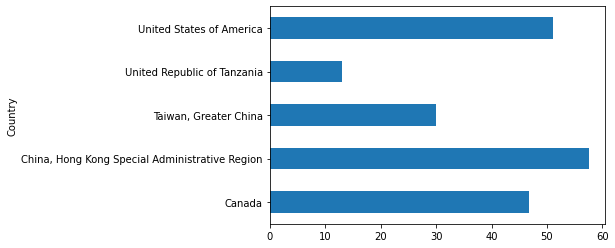

In [40]:
data_country5.groupby(['Country'])['Percentage_reduction'].mean().plot.barh()

## Modeling Emission reduction

In [41]:
from sklearn.model_selection import train_test_split
seed = 42

train, test = train_test_split(data_country5, test_size = 0.2, random_state=seed, shuffle = True)#, stratify = data_country5['car_price_bins'])

In [42]:
X_train, X_test = train.drop('Base_year_emissions', axis = 1).copy(), test.drop('Base_year_emissions', axis = 1).copy()
y_train, y_test = train['Base_year_emissions'].copy(), test['Base_year_emissions'].copy()

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [44]:
cat_var = train.columns[train.dtypes == 'object'].to_list()


In [45]:
cat_var

['Organization',
 'City',
 'Country',
 'CDP_region',
 'Report_authority',
 'Access',
 'City_boundary',
 'Type_target',
 'Sector',
 'Target_boundary',
 'Sector_target',
 'Paris_agreement',
 'Higher_level',
 'City_location']

In [46]:
X_train[cat_var]

,Organization,City,Country,CDP_region,Report_authority,Access,City_boundary,Type_target,Sector,Target_boundary,Sector_target,Paris_agreement,Higher_level,City_location
782,City of Lakewood,Lakewood,United States of America,North America,"CDP Cities, ICLEI - Local Governments for Sust...",public,City / Municipality,Base year emissions (absolute) target,All emissions sources included in city inventory,Same – covers entire city and nothing else,"Commercial buildings, Energy industry, Heating...",No,No,POINT (-105.081 39.7047)
1718,"City of South Miami, FL",South Miami,United States of America,North America,"CDP Cities, ICLEI - Local Governments for Sust...",public,Local government area within a city / metropol...,Base year intensity target,All emissions sources included in city inventory,NaN,NaN,Yes - 1.5 °C,No,POINT (-80.1918 25.7617)
1338,Town of Blacksburg,Blacksburg,United States of America,North America,"CDP Cities, ICLEI - Local Governments for Sust...",public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-80.4139 37.2296)
1612,City of Philadelphia,Philadelphia,United States of America,North America,"C40, CDP Cities, ICLEI - Local Governments for...",public,City / Municipality,Absolute target,Total city-wide emissions,NaN,NaN,NaN,NaN,POINT (-75.1638 39.9523)
1124,City of Providence,Providence,United States of America,North America,"CDP Cities, ICLEI - Local Governments for Sust...",public,City / Municipality,Absolute target,Total city-wide emissions,NaN,NaN,NaN,NaN,POINT (-71.4128 41.824)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,"City of Brisbane, CA","Brisbane, CA",United States of America,North America,"CDP Cities, ICLEI - Local Governments for Sust...",public,City / Municipality,Base year emissions (absolute) target,All emissions sources included in city inventory,Same – covers entire city and nothing else,NaN,NaN,Yes,POINT (-122.4 37.6808)
311,"City of Piedmont, CA",Piedmont,United States of America,North America,"CDP Cities, ICLEI - Local Governments for Sust...",public,City / Municipality,Base year emissions (absolute) target,All emissions sources included in city inventory,Larger – covers the whole city and adjoining a...,"Commercial buildings, Energy industry, Heating...","Other: It has 40% by 2030, but by 2005 year no...",Yes,POINT (-122.232 37.8244)
863,"City of Beverly, MA",NaN,United States of America,North America,"CDP Cities, ICLEI - Local Governments for Sust...",public,City / Municipality,No target,NaN,NaN,NaN,NaN,NaN,NaN
1391,"City of Tempe, AZ",Tempe,United States of America,North America,"CDP Cities, ICLEI - Local Governments for Sust...",public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-111.94 33.4255)


In [47]:
!pip install -q catboost

In [48]:
from catboost import CatBoostRegressor, Pool

In [49]:
import plotly.express as px

In [50]:
X_train[cat_var]

,Organization,City,Country,CDP_region,Report_authority,Access,City_boundary,Type_target,Sector,Target_boundary,Sector_target,Paris_agreement,Higher_level,City_location
782,City of Lakewood,Lakewood,United States of America,North America,"CDP Cities, ICLEI - Local Governments for Sust...",public,City / Municipality,Base year emissions (absolute) target,All emissions sources included in city inventory,Same – covers entire city and nothing else,"Commercial buildings, Energy industry, Heating...",No,No,POINT (-105.081 39.7047)
1718,"City of South Miami, FL",South Miami,United States of America,North America,"CDP Cities, ICLEI - Local Governments for Sust...",public,Local government area within a city / metropol...,Base year intensity target,All emissions sources included in city inventory,NaN,NaN,Yes - 1.5 °C,No,POINT (-80.1918 25.7617)
1338,Town of Blacksburg,Blacksburg,United States of America,North America,"CDP Cities, ICLEI - Local Governments for Sust...",public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-80.4139 37.2296)
1612,City of Philadelphia,Philadelphia,United States of America,North America,"C40, CDP Cities, ICLEI - Local Governments for...",public,City / Municipality,Absolute target,Total city-wide emissions,NaN,NaN,NaN,NaN,POINT (-75.1638 39.9523)
1124,City of Providence,Providence,United States of America,North America,"CDP Cities, ICLEI - Local Governments for Sust...",public,City / Municipality,Absolute target,Total city-wide emissions,NaN,NaN,NaN,NaN,POINT (-71.4128 41.824)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,"City of Brisbane, CA","Brisbane, CA",United States of America,North America,"CDP Cities, ICLEI - Local Governments for Sust...",public,City / Municipality,Base year emissions (absolute) target,All emissions sources included in city inventory,Same – covers entire city and nothing else,NaN,NaN,Yes,POINT (-122.4 37.6808)
311,"City of Piedmont, CA",Piedmont,United States of America,North America,"CDP Cities, ICLEI - Local Governments for Sust...",public,City / Municipality,Base year emissions (absolute) target,All emissions sources included in city inventory,Larger – covers the whole city and adjoining a...,"Commercial buildings, Energy industry, Heating...","Other: It has 40% by 2030, but by 2005 year no...",Yes,POINT (-122.232 37.8244)
863,"City of Beverly, MA",NaN,United States of America,North America,"CDP Cities, ICLEI - Local Governments for Sust...",public,City / Municipality,No target,NaN,NaN,NaN,NaN,NaN,NaN
1391,"City of Tempe, AZ",Tempe,United States of America,North America,"CDP Cities, ICLEI - Local Governments for Sust...",public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-111.94 33.4255)


In [51]:
# # initialize Pool
train_pool = Pool(X_train, 
                  y_train, 
                  cat_features=cat_var)
test_pool = Pool(X_test, 
                 cat_features=cat_var) 

CatBoostError: ignored

In [ ]:
# data_country5.groupby(['Country'])['Emission_per_capita'].sum()#.plot.barh(figsize = (10,30))#.size()#.reset_index('Percentage_reduction')#, x= 'Country'

## Simple EDA: Profiling

In [ ]:
!pip install -q pandas-profiling

In [ ]:
!pip install -q pandas==0.25.3

In [ ]:
import pandas as pd

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
ProfileReport(data_bycountry.median())

## Emission (Target-Base)

In [ ]:
data_country5['Target_Base'] = data_country5['Target_emissions'] - data_country5['Base_year_emissions']

In [ ]:
data_country5.groupby(['Country']).sum()['Target_Base'].sort_values(ascending=True)[:10].plot.barh()

In [ ]:
data_country5.head(2)